## Лабораторна робота №2.



Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації.

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.






Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою `titanic.csv`.  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.```
  
  
  

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('titanic.csv')


**Задача 1:** Який відсоток виживання серед чоловіків / жінок?

In [8]:
total_passengers = dataset["PassengerId"].max()
num_survived = dataset["Survived"].sum()
num_dead = total_passengers - num_survived 
survival_by_gender = dataset.groupby("Sex")["Survived"].sum()
percentage_survived = (num_survived / total_passengers) * 100
percentage_dead = (num_dead / total_passengers) * 100
total_gender_count = dataset['Sex'].value_counts()
percentage_female_survived = (survival_by_gender['female'] / num_survived) * 100
percentage_male_survived = (survival_by_gender['male'] / num_survived) * 100
female_counts = np.array([total_gender_count['female'] - survival_by_gender['female'], survival_by_gender['female']])
male_counts = np.array([total_gender_count['male'] - survival_by_gender['male'], survival_by_gender['male']])
print(f"Percentage Survived: {round(percentage_survived, 2)}%, Percentage Dead: {round(percentage_dead, 2)}%")


Percentage Survived: 38.38%, Percentage Dead: 61.62%


**Задача 2:** Відтворіть ці графіки  
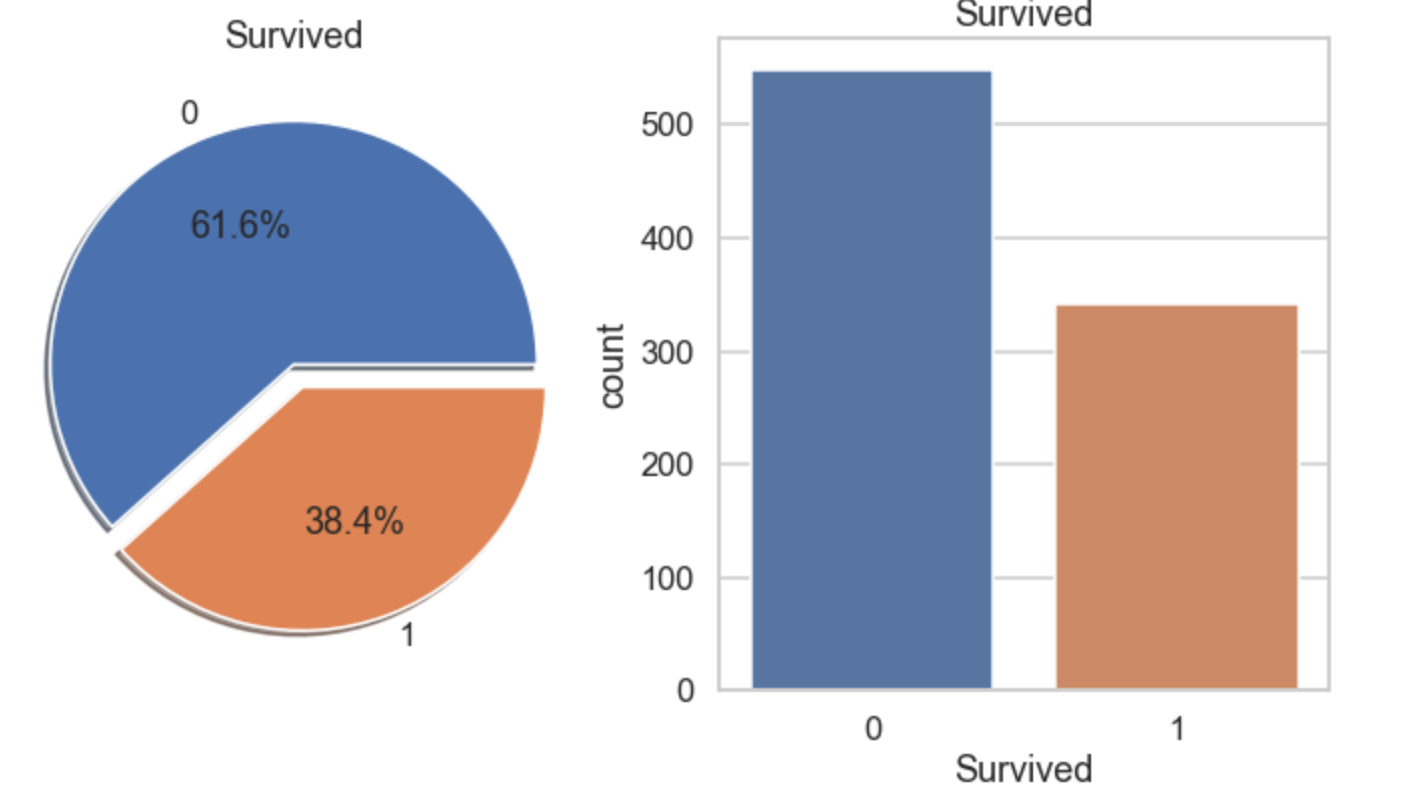


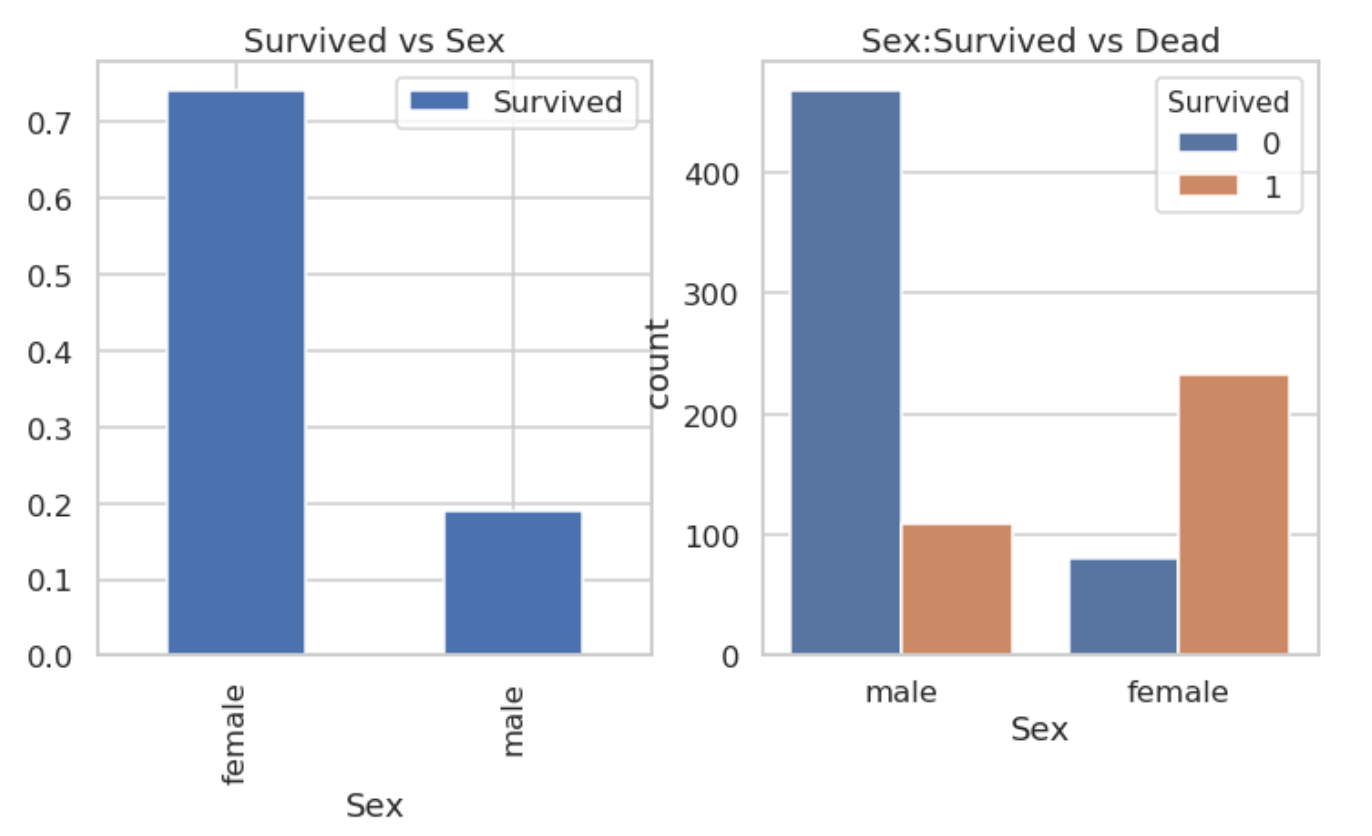

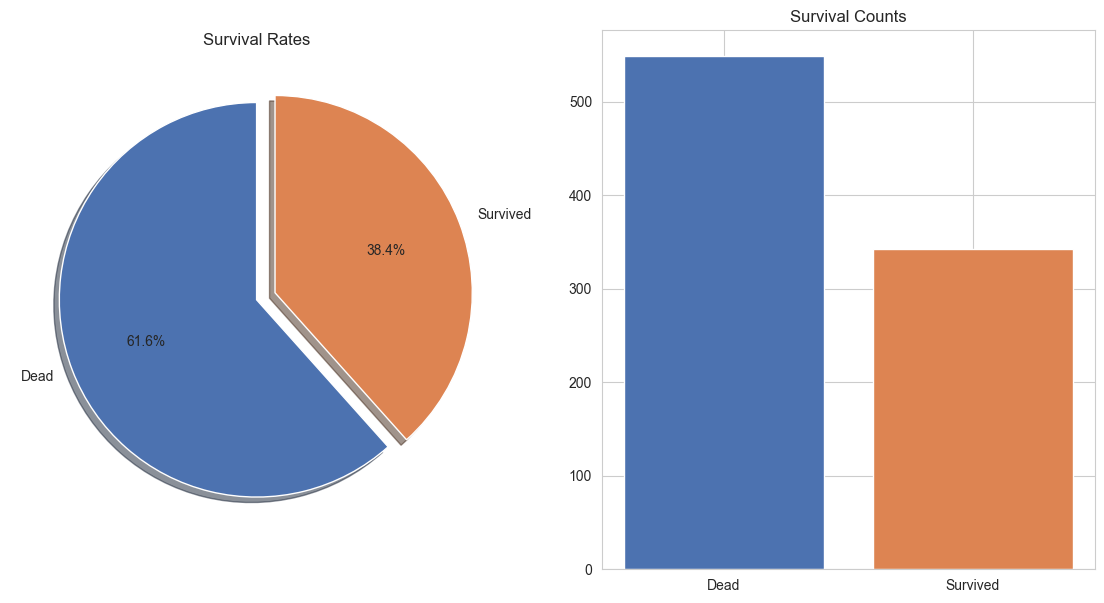

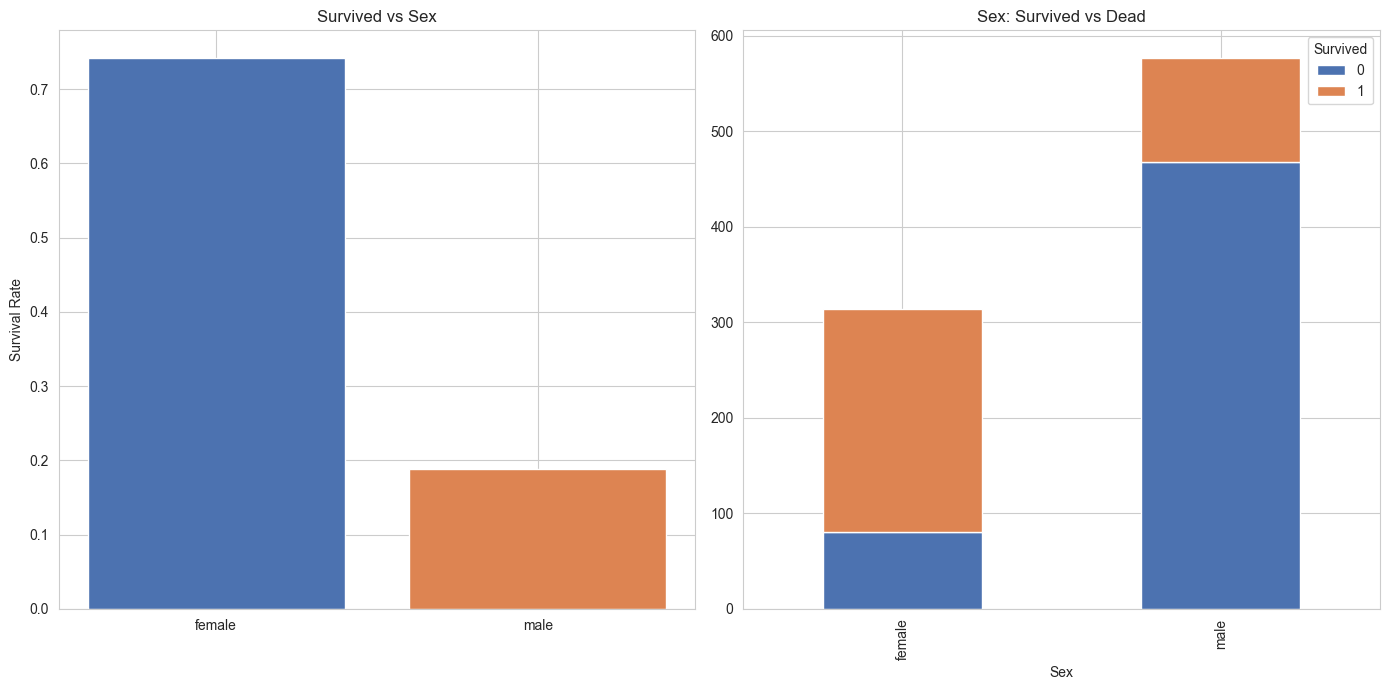

In [2]:

total_passengers = len(dataset)
survived_count = dataset['Survived'].sum()
dead_count = total_passengers - survived_count
survived_percentage = (survived_count / total_passengers) * 100
dead_percentage = (dead_count / total_passengers) * 100
survival_by_gender = dataset.groupby('Sex')['Survived'].mean()
gender_counts = dataset.groupby('Sex')['Survived'].value_counts().unstack()
colors = sns.color_palette('deep')
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(1, 2, figsize=(14, 7))
ax1[0].pie([dead_percentage, survived_percentage], labels=['Dead', 'Survived'], colors=colors, explode=[0, 0.1], autopct='%1.1f%%', shadow=True, startangle=90)
ax1[0].set_title('Survival Rates')
ax1[1].bar(['Dead', 'Survived'], [dead_count, survived_count], color=colors)
ax1[1].set_title('Survival Counts')
fig, ax2 = plt.subplots(1, 2, figsize=(14, 7))
ax2[0].bar(survival_by_gender.index, survival_by_gender.values, color=colors)
ax2[0].set_title('Survived vs Sex')
ax2[0].set_ylabel('Survival Rate')
gender_counts.plot(kind='bar', stacked=True, ax=ax2[1], color=colors)
ax2[1].set_title('Sex: Survived vs Dead')
plt.tight_layout()
plt.show()


Прокоментуйте побудовані графіки

Графіки демонструють в відсотках шанси виживання під час катастрофи Титаніка. Вижили(1) 38.4% , а 61.6%(0) повезло трошки менше ніж першим.
графіки показують, що жінки мали набагато вищі шанси на виживання порівняно з чоловіками.


**Задача 3:** Скільки пропущених значень в датасеті по кожній із змінних?

In [4]:
missing_values = dataset.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Задача 4:** Назвіть найпопулярніше **жіноче** ім'я на кораблі.

In [17]:
female_names = dataset[dataset['Sex'] == 'female']
female_first_names = female_names['Name'].str.extract(r'(?:Miss\. |Mrs\.[^)]* )([^ ]+)|Mlle\. ([^ ]+)|Lady\. ([^ ]+)')[0].dropna()
most_popular_female_name = female_first_names.mode()[0]
name_count = female_first_names.value_counts()[most_popular_female_name]
most_popular_female_name, name_count

('Anna', 9)

**Задача 5:** Назвіть найпопулярніше **чоловіче** ім'я на кораблі.

In [11]:
male_names = dataset[dataset['Sex'] == 'male']['Name']
first_names = male_names.apply(lambda x: x.split(', ')[1].split('. ')[1].split(' ')[0])
most_popular_name = first_names.value_counts().idxmax()
count = first_names.value_counts().max()
most_popular_name, count


('William', 35)

**Задача 6:** Побудуйте діаграми співвідношення загиблих та виживших за інформацією про те, квитки якого класу були у пасажирів.
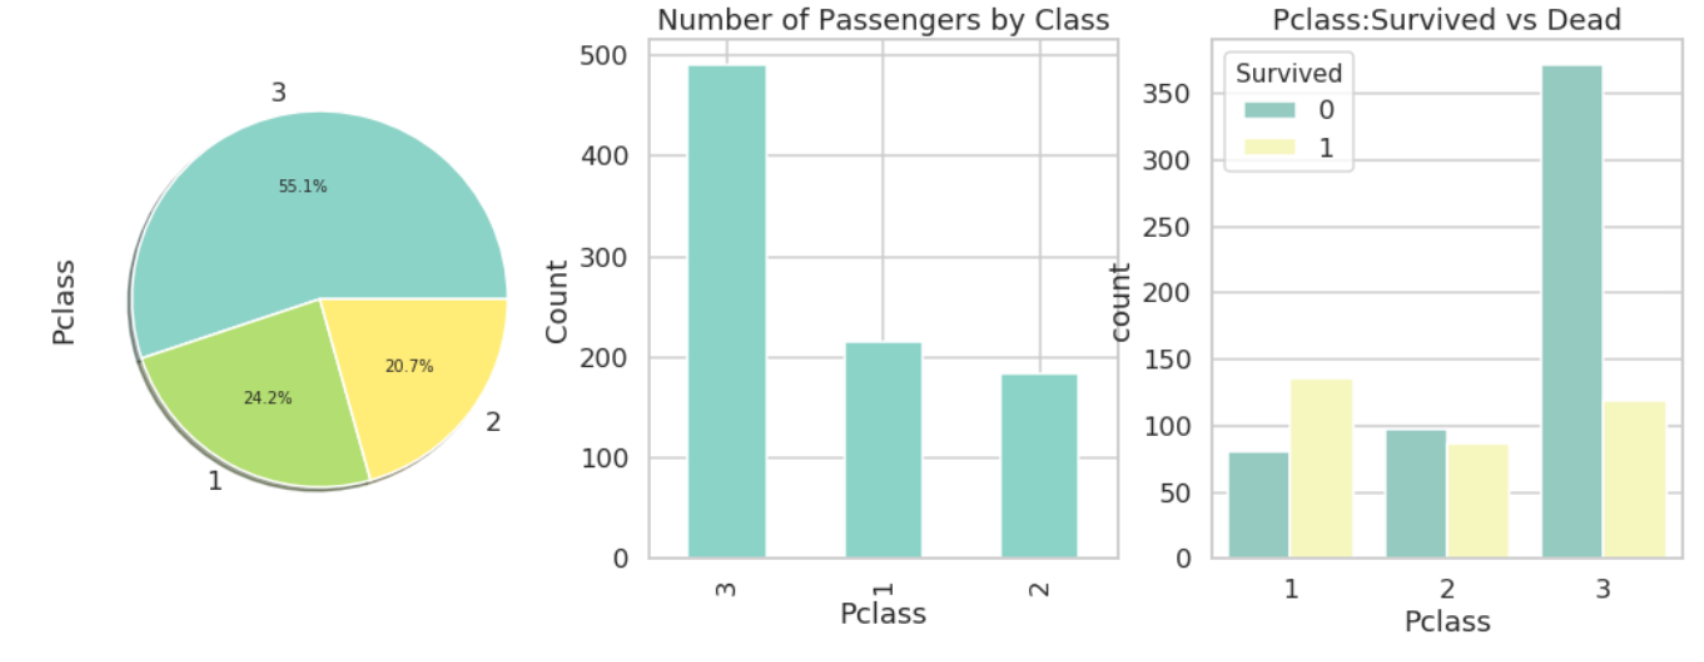

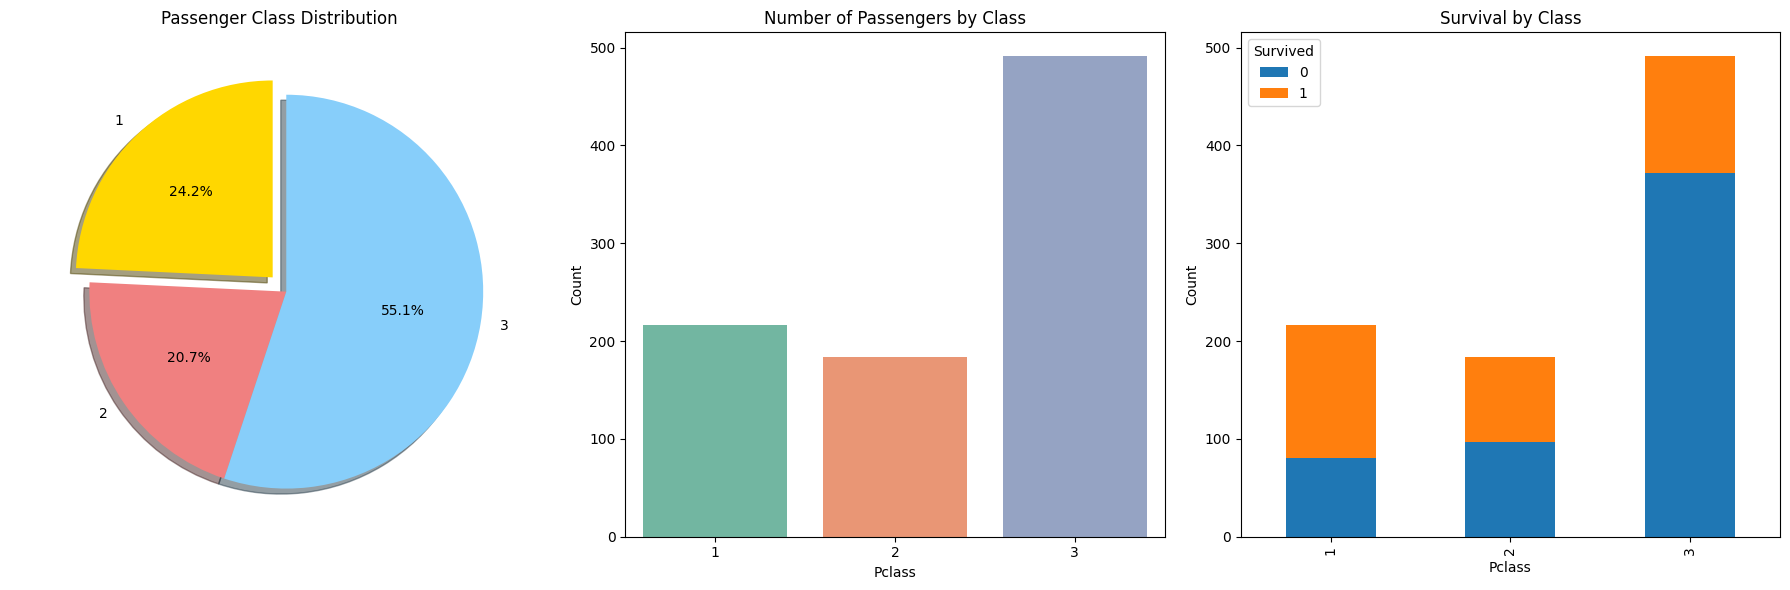

In [19]:
import seaborn as sns
class_counts = titanic_df['Pclass'].value_counts().sort_index()
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
pie_colors = ['gold', 'lightcoral', 'lightskyblue']
pie_explode = (0.1, 0, 0)
ax[0].pie(class_counts, explode=pie_explode, labels=class_counts.index, autopct='%1.1f%%',
          shadow=True, colors=pie_colors, startangle=90)
ax[0].set_title('Passenger Class Distribution')
ax[0].axis('equal')
sns.countplot(ax=ax[1], x='Pclass', hue='Pclass', data=titanic_df, palette='Set2', legend=False)
ax[1].set_title('Number of Passengers by Class')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Count')
survival_by_pclass = titanic_df.groupby(['Pclass', 'Survived']).size().unstack()
survival_by_pclass.plot(kind='bar', stacked=True, ax=ax[2], color=["#1f77b4", "#ff7f0e"])
ax[2].set_title('Survival by Class')
ax[2].set_xlabel('Pclass')
ax[2].set_ylabel('Count')
plt.tight_layout()
plt.show()


На цих графіках представлено розподіл пасажирів за класами кают їх кількість у кожному класі та виживання за класами. Перший графік показує, що більшість пасажирів подорожували третім класом, другий детально демонструє кількість пасажирів у кожному класі, а третій відображає вищі шанси на виживання у пасажирів першого та другого класів порівняно з третім.

**Задача 7:** Побудуйте наступні графіки та опишіть, що власне на них відображається.  
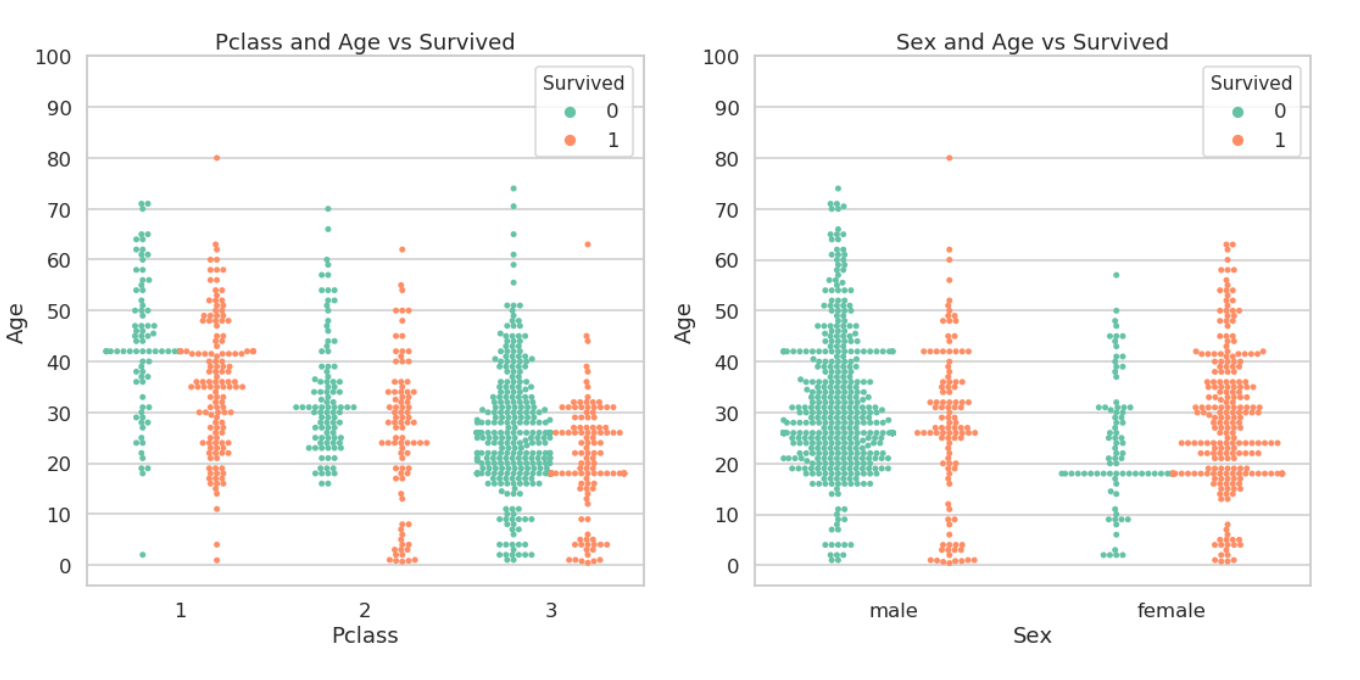![image.png](attachment:51486806-bd5d-4ae3-b95a-548aebf83de2.png)

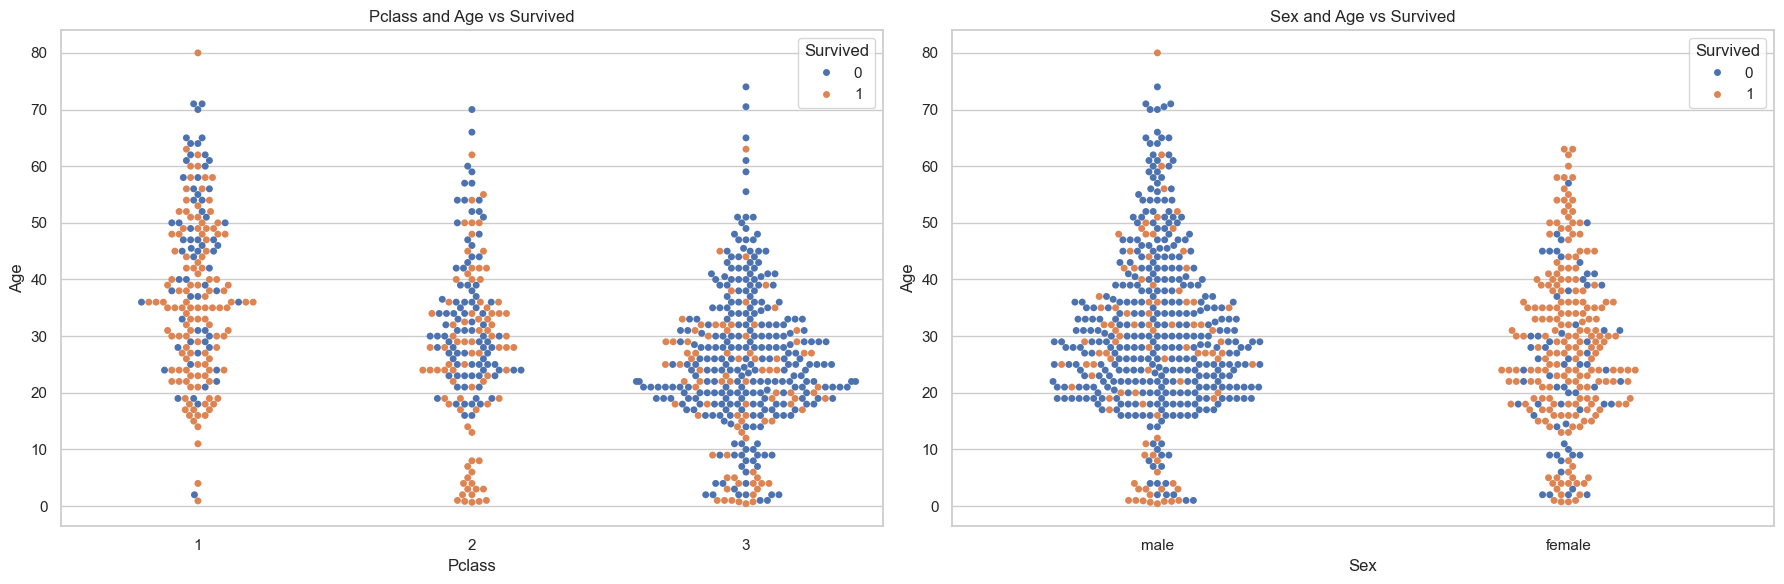

In [18]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.swarmplot(ax=axes[0], x="Pclass", y="Age", hue="Survived", data=dataset)
axes[0].set_title("Pclass and Age vs Survived")
sns.swarmplot(ax=axes[1], x="Sex", y="Age", hue="Survived", data=dataset)
axes[1].set_title("Sex and Age vs Survived")
plt.tight_layout()
plt.show()


На першому графіку видно, що молодші пасажири третього класу та старші першого класу мали більшу кількість виживших. На другому графіку видно, що жінки всіх вікових груп мали вищі шанси на виживання, ніж чоловіки, особливо серед молодших .

**Задача 8** Побудуйте наступні діаграми розподілів:  

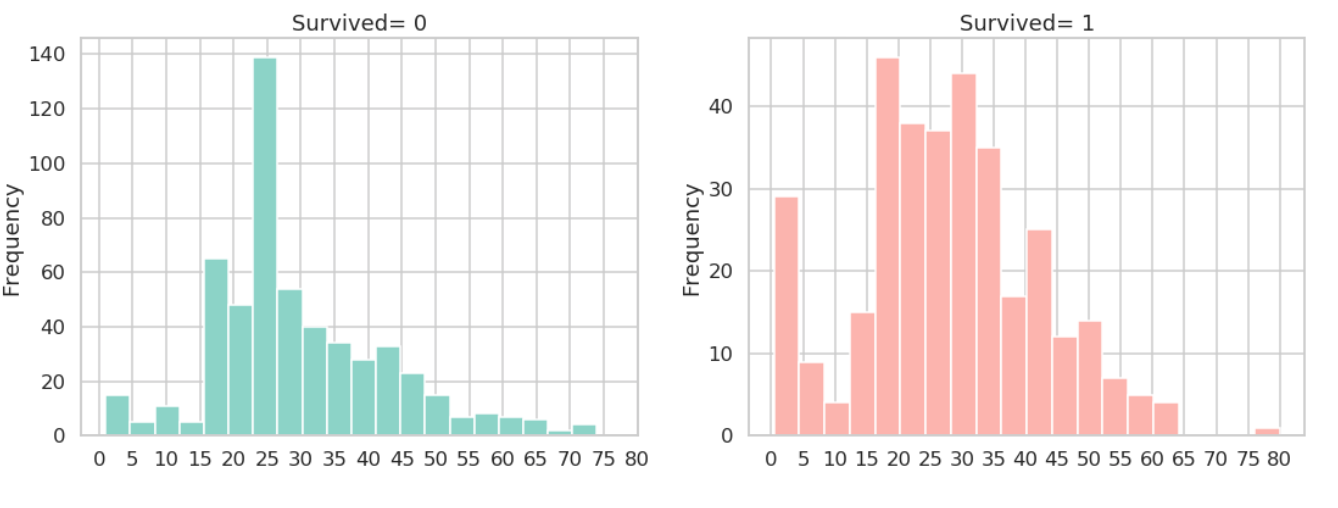



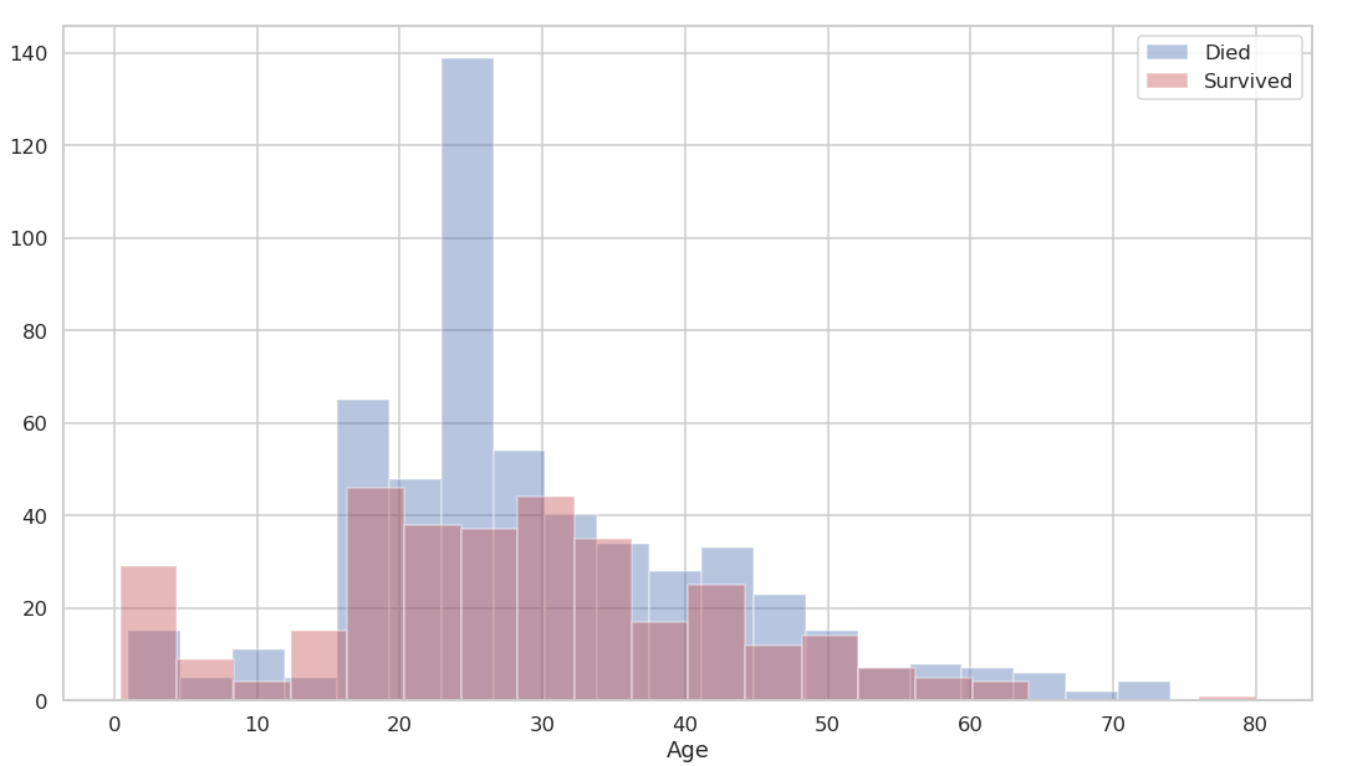

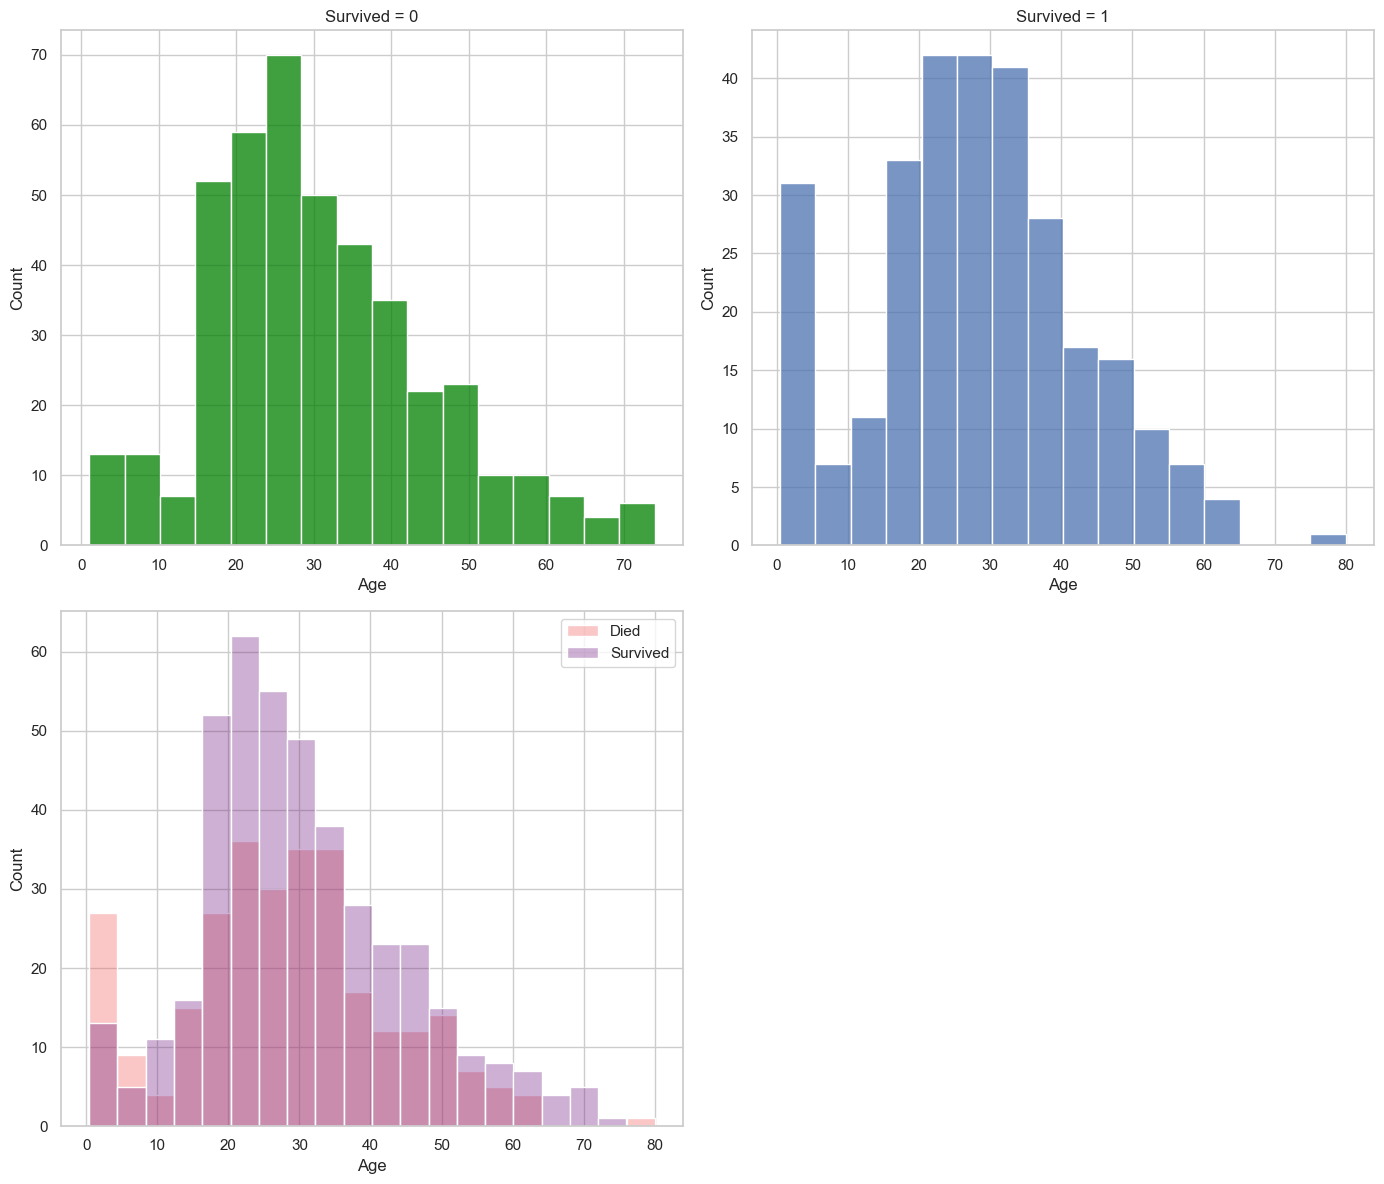

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
sns.histplot(data=dataset[dataset["Survived"] == 0], x='Age', color='green', ax=axes[0, 0])
axes[0, 0].set_title("Survived = 0")
sns.histplot(data=dataset[dataset["Survived"] == 1], x='Age', ax=axes[0, 1] )
axes[0, 1].set_title("Survived = 1")
sns.histplot(data=dataset, x='Age', hue="Survived", palette='magma', alpha=0.35, ax=axes[1, 0])
axes[1, 0].legend(["Died", "Survived"])
fig.delaxes(axes[1][1])
plt.tight_layout()
plt.show()


Що можна сказати, про розподіли змінних згідно до цих гістограм? Чи достатньо лише побудованих візуалізацій для висновків щодо розподілів та статистичних оцінок?


**Задача 9:** Побудуйте наступні діаграми та проведіть аналітику шансів на виживання серед пасажирів:  
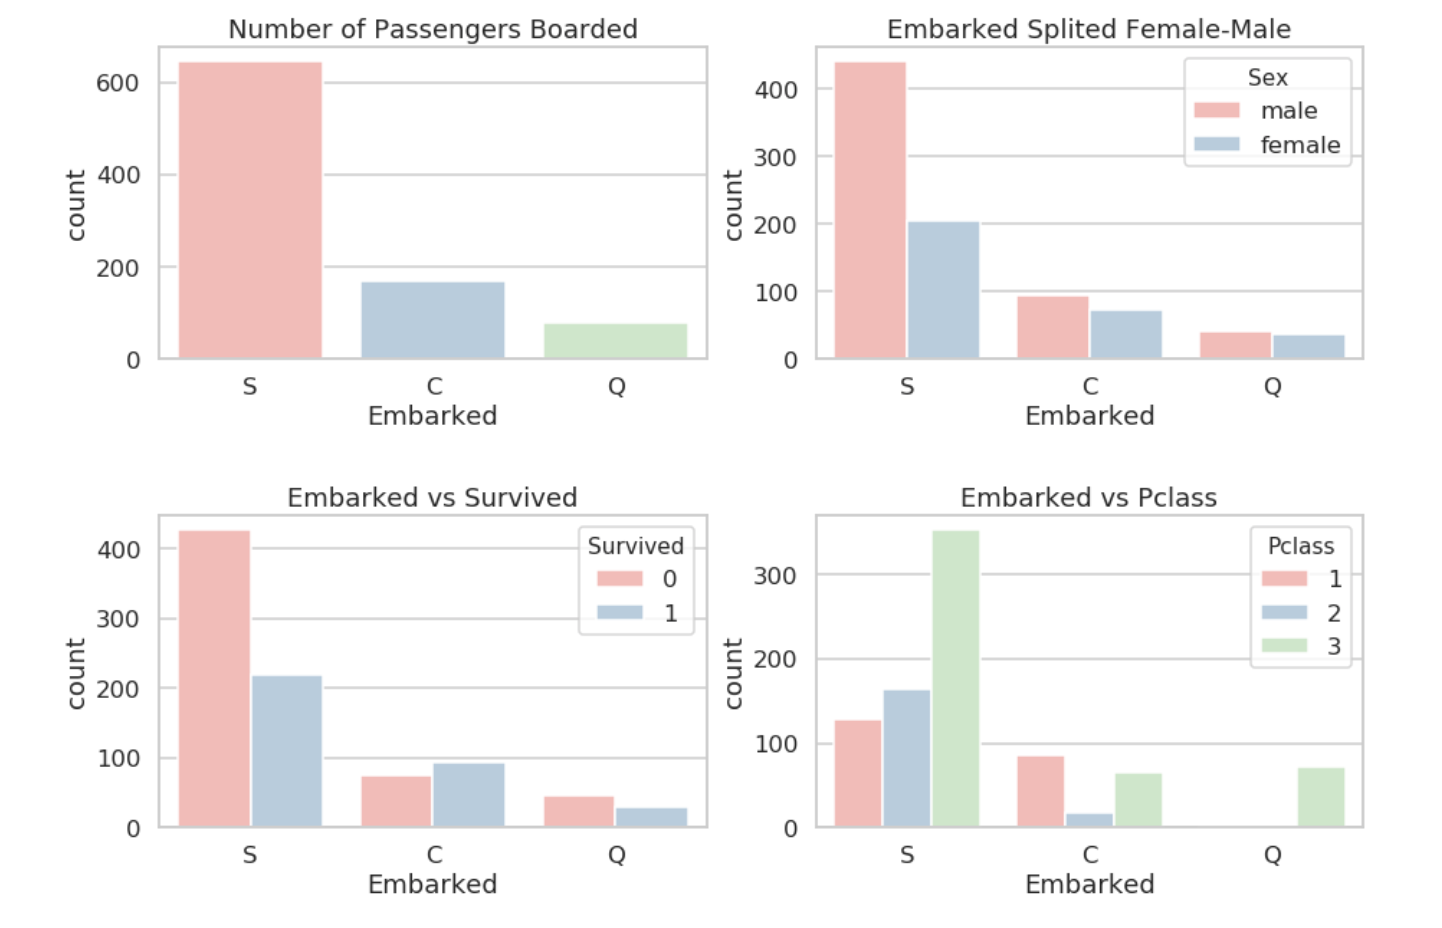

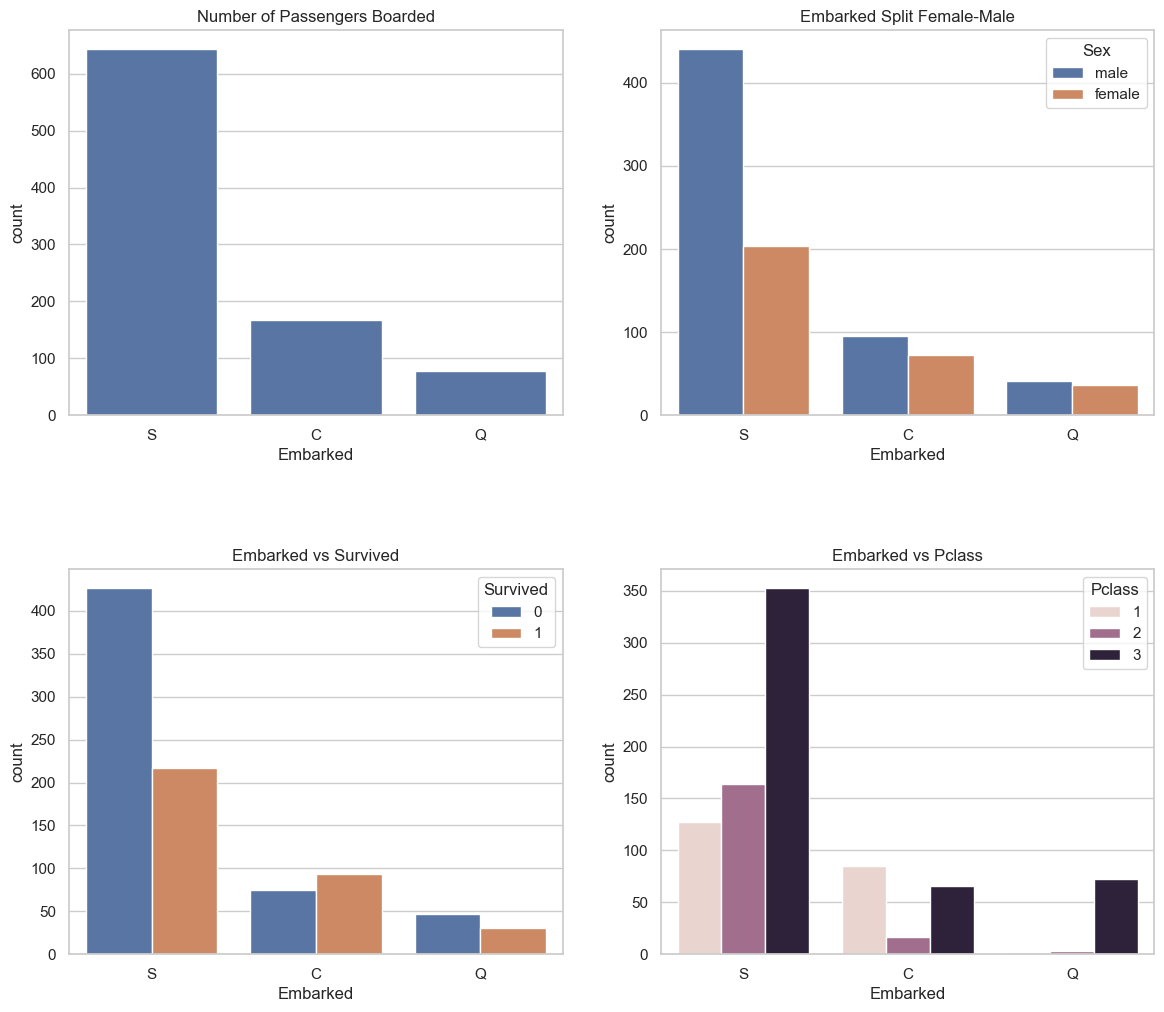

In [29]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4)
sns.countplot(ax=axes[0, 0], x='Embarked', data=dataset)
axes[0, 0].set_title('Number of Passengers Boarded')
sns.countplot(ax=axes[0, 1], x='Embarked', hue='Sex', data=dataset)
axes[0, 1].set_title('Embarked Split Female-Male')
sns.countplot(ax=axes[1, 0], x='Embarked', hue='Survived', data=dataset)
axes[1, 0].set_title('Embarked vs Survived')
sns.countplot(ax=axes[1, 1], x='Embarked', hue='Pclass', data=dataset)
axes[1, 1].set_title('Embarked vs Pclass')
plt.show()


***Завдача 10** Побудуйте діаграму розподілу ```вартості квитка``` відповідно до якого классу належіть пасажир.

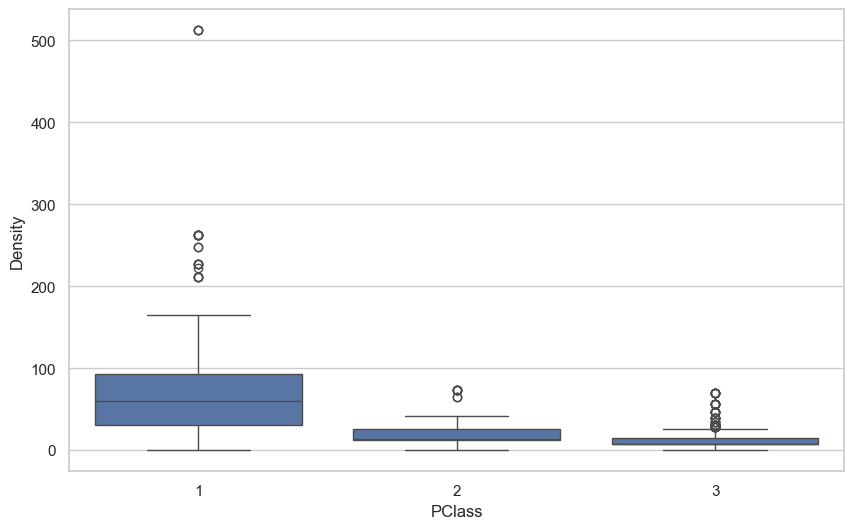

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=dataset)
plt.xlabel('PClass')
plt.ylabel('Density')
plt.show()


Графік показує, що квитки першого класу мають ширший діапазон цін, в той час як ціни квитків другого та третього класів зосереджені ближче до нижчих вартостей.